In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
import tqdm

In [2]:
data = pd.read_csv('data.csv',index_col=0)
data = data.set_index(data.timestamp)

In [3]:
data.head()

,address,x,y,z,timestamp
timestamp,,,,,
2018-07-01 00:55:41.678,-6196490120761152012,-47.9602,-59.9457,6.24468,2018-07-01 00:55:41.678
2018-07-01 00:55:42.923,-6196490120761152012,-46.4965,-60.0888,6.25606,2018-07-01 00:55:42.923
2018-07-01 00:55:44.163,-6196490120761152012,-45.1626,-60.3775,6.46899,2018-07-01 00:55:44.163
2018-07-01 00:55:45.412,-6196490120761152012,-44.1827,-60.4705,6.57457,2018-07-01 00:55:45.412
2018-07-01 00:55:46.704,-6196490120761152012,-43.9995,-60.4705,6.58655,2018-07-01 00:55:46.704


In [ ]:
plt.plot(data.x[0:10000])
plt.show()

C:\Users\saran\AppData\Local\conda\conda\envs\py35\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


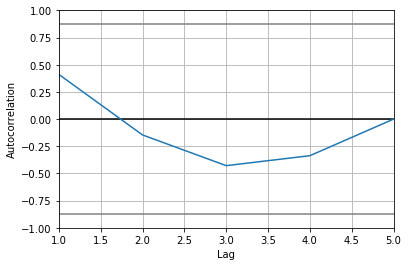

In [5]:

autocorrelation_plot(data.x[0:5])
plt.show()


### Strong correlation with the lag of 1, Hence AR value set to 1
This sets the lag value to 1 for autoregression, uses a difference order of 1 to make the time series stationary, 
and uses a moving average model of 0.

In [ ]:
### Residual analysis suggests estimation model quality.
### Difference between predicred and observed is called Residual
### autocorrelation of the residuals will say any relation exists between them
### autocorr == positive ; Model is good, 0 - reconsider the model orders 

In [7]:
### Fit the model
import tqdm 
X = data.x.values[0:100000]

size = int(len(X) * 0.98)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in tqdm.tqdm(range(len(test))):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    # print('predicted=%f, expected=%f' % (yhat, obs))



  4%|██▉                                                                           | 74/2000 [02:50<1:15:50,  2.36s/it]C:\Users\saran\AppData\Local\conda\conda\envs\py35\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 16%|████████████▏                                                                | 317/2000 [12:28<1:04:01,  2.28s/it]C:\Users\saran\AppData\Local\conda\conda\envs\py35\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 49%|██████████████████████████████████████▍                                        | 972/2000 [38:38<42:19,  2.47s/it]

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,explained_variance_score

# MAPE 
def mean_absolute_percentage_error(test, predictions):
    return np.mean(np.abs((test - predictions) / test)) * 100

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
error = r2_score(test, predictions)
print('Test r2 score: %.3f' % error)
error = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % error)
error = mean_absolute_percentage_error(test, predictions)
print('Test MAPE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.title('Test vs Predictions')
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
plt.plot(X)

RMSE

Mean absolute error

Mean absolute percentage error


In [ ]:
!pip install tqdm

### ARIMA 

#### Three parameters: seasonality, trend, and noise. These parameters are labeled p,d,and q

https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c

In [9]:
import plotly.plotly as ply
import cufflinks as cf


# Decomposition
To see trend, seasonal, and residual components of our data.

In [14]:
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose


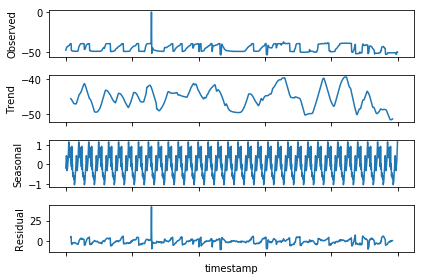

In [35]:
result = seasonal_decompose(data.x[0:1000].interpolate(), freq= 30)  # Every 2 mins,  Hence freq 30 means every hour
res = result.plot()


#### THERE IS NO TREND IN DATA; USE RANDOM WALK WITH MOVING AVERAGE SET TO 1
#### DATA IS SEASONAL; 


In [ ]:
#### p = Autoregressive terms d = q = 

C:\Users\saran\AppData\Local\conda\conda\envs\py35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\saran\AppData\Local\conda\conda\envs\py35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\saran\AppData\Local\conda\conda\envs\py35\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\User

                             ARIMA Model Results                              
Dep. Variable:                    D.x   No. Observations:                99999
Model:                 ARIMA(1, 1, 0)   Log Likelihood             -155688.809
Method:                       css-mle   S.D. of innovations              1.148
Date:                Sun, 18 Nov 2018   AIC                         311383.618
Time:                        13:28:42   BIC                         311412.157
Sample:                             1   HQIC                        311392.279
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.038e-05      0.004      0.012      0.991      -0.008       0.009
ar.L1.D.x      0.1589      0.003     50.897      0.000       0.153       0.165
                                    Roots           

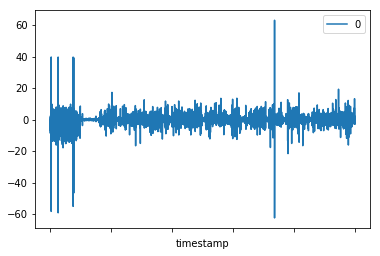

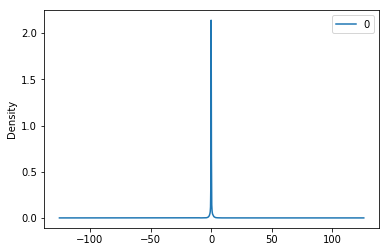

                  0
count  99999.000000
mean      -0.000002
std        1.147941
min      -62.422049
25%       -0.041927
50%       -0.000042
75%        0.038470
max       63.101684


In [6]:
# fit model

model = ARIMA(data.x[0:100000], order=(1,1,0))
model_fit = model.fit(disp=0)   # If disp is True, convergance information will be printed 
print(model_fit.summary())

# plot residual errors
residuals = DataFrame(model_fit.resid)
print(residuals)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
### Using FFT

In [ ]:
# Run FFT on data

fft = np.fft.fft(data.x[0:1000])
freq = np.fft.fftfreq(len(data.x[0:1000]))

In [ ]:
print(fft.min())
print(fft.max())

In [ ]:
plt.plot(fft)
plt.show()

In [ ]:
### Filter lower amplitude and high frequency components from fft

In [ ]:
### Low pass filter: Only allows signals less than 597.7023775474662+428.40496450913423j 

### i.e., 

In [ ]:
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    
    # Filter response 
    
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y